# Quantum mechanics: Solving the stationary Schrödinger equation

## Quantum harmonic oscillator

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h = 1
m = 1

In [3]:
V = 0.5

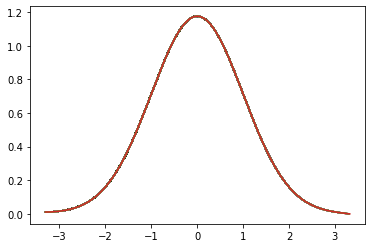

In [4]:
psi = 0.01
dpsi = 0
dx = 0.01

E = 0.5

# V*x**2 = E + 10V
a = np.sqrt(10 + E / V)
x = -a

x_list = []
psi_list = []

while x <= a:
    ddpsi = 2*m/h**2 * (V*x**2 - E) * psi
    dpsi = dpsi + ddpsi*dx
    psi = psi + dpsi*dx
    x = x + dx
    x_list.append(x)
    psi_list.append(psi)
    plt.plot(x_list, psi_list)

0.49999999999999994

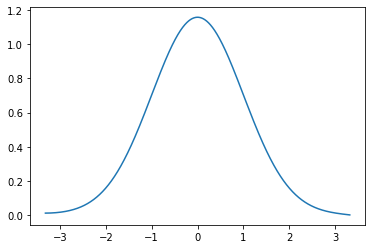

In [5]:
dx = 0.001
E = 0
psi = 1
dE = 0.05

while abs(psi) > 0.02:
    psi = 0.01
    dpsi = 0.0
    E = E + dE
    a = np.sqrt(10 + E / V)
    x = -a
    x_list = []
    psi_list = []
    
    while x <= a:
        ddpsi = 2*m/h**2 * (V*x**2 - E) * psi
        dpsi = dpsi + ddpsi*dx
        psi = psi + dpsi*dx
        x = x + dx
        x_list.append(x)
        psi_list.append(psi)
        
plt.plot(x_list, psi_list)
E

In [6]:
E = 0
psi = 1
count = 1
x_values = []
eigen_functions = []
eigen_energies = []
nmax = 10

while count <= nmax:
    psi = 1
    
    while abs(psi) > 0.02:
        psi = 0.01
        dpsi = 0.0
        E = E + 0.05
        a = np.sqrt(10 + E / V)
        x = -a
        x_list = []
        psi_list = []

        while x <= a:
            ddpsi = 2*m/h**2 * (V*x**2 - E) * psi
            dpsi = dpsi + ddpsi*dx
            psi = psi + dpsi*dx
            x = x + dx
            x_list.append(x)
            psi_list.append(psi)
    
    eigen_functions.append([psi_list])
    eigen_energies.append(E)
    x_values.append(x_list)
    count = count + 1
    E = E*1.1

In [7]:
eigen_energies

[0.49999999999999994,
 1.5000000000000007,
 2.499999999999999,
 3.4999999999999964,
 4.499999999999995,
 5.499999999999993,
 6.499999999999991,
 7.499999999999989,
 8.499999999999993,
 9.499999999999995]

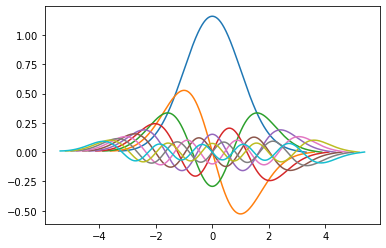

In [8]:
count = 1

while count <= nmax:
    plt.plot(x_values[count-1], eigen_functions[count-1][0])
    count = count + 1

In [9]:
np.dot(eigen_functions[2][0], eigen_functions[2][0])*dx

0.30246220871343316

In [10]:
count = 1

while count <= nmax:
    norm = np.dot(eigen_functions[count-1][0], eigen_functions[count-1][0])*dx
    eigen_functions[count-1][0][:] = [x / np.sqrt(norm) for x in eigen_functions[count-1][0]]
    count = count + 1

In [11]:
np.dot(eigen_functions[2][0], eigen_functions[2][0])*dx

1.0000000000000002

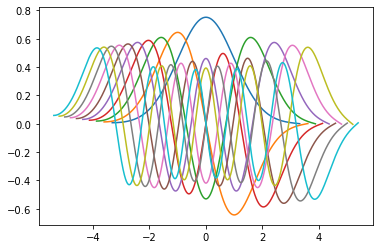

In [12]:
count = 1

while count <= nmax:
    plt.plot(x_values[count-1], eigen_functions[count-1][0])
    count = count + 1

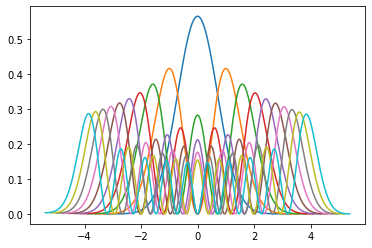

In [13]:
count = 1

while count <= nmax:
    plt.plot(x_values[count-1], np.square(eigen_functions[count-1][0]))
    count = count + 1

C:\Users\fedin\AppData\Local\Temp/ipykernel_11684/1551912931.py:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x1*np.sqrt(eigen_energies[nmax-1]/V),1/np.sqrt(1-x1**2)/7)


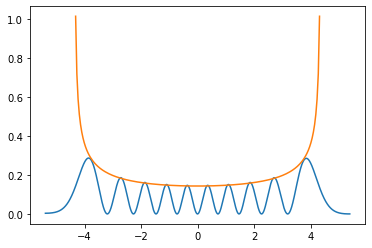

In [14]:
# QM probability
plt.plot(x_values[nmax-1], np.square(eigen_functions[nmax-1][0]))

# classical probability p(x)=|1/v(x)|
# x(t) = cos(t) or t(x)=arccos(x) --> v(t)=-sin(t) or v(x)=-sin(arccos(x))
# p(x)=1/sin(arccos(x)) = 1/sqrt(1-x**2)

x1 = np.arange(-1,1,1/100)
plt.plot(x1*np.sqrt(eigen_energies[nmax-1]/V),1/np.sqrt(1-x1**2)/7)

In [15]:
count = 1

while count <= nmax:
    eigen_functions[count-1][0][:] = [x + eigen_energies[count-1] for x in eigen_functions[count-1][0]]
    count = count + 1

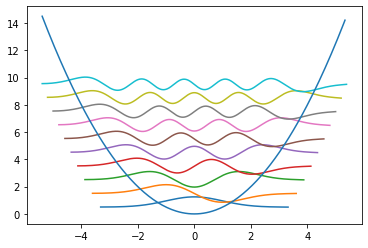

In [16]:
count = 1

while count <= nmax:
    plt.plot(x_values[count-1], eigen_functions[count-1][0])
    count = count + 1
    
x1 = np.arange(-a,a,a/100)
plt.plot(x1,V*x1**2)